# Tide Gauges GES 371 Final Project
Devin Hogate

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [221]:
#San Francisco Tide Gauges, (37.81, -122.47)
url1 = r'C:\Users\Devin\Documents\23_24Spring\GES371\data\h551.csv'
# Daily data from different tide gauge, Toyama Japan (36.77, 137.22)
url2 = r'C:\Users\Devin\Documents\23_24Spring\GES371\data\h349.csv'

In [222]:
# Import the necessary packages for making a map
import cartopy.crs as ccrs
import cartopy.feature as cf

c:\Users\Devin\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Devin\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


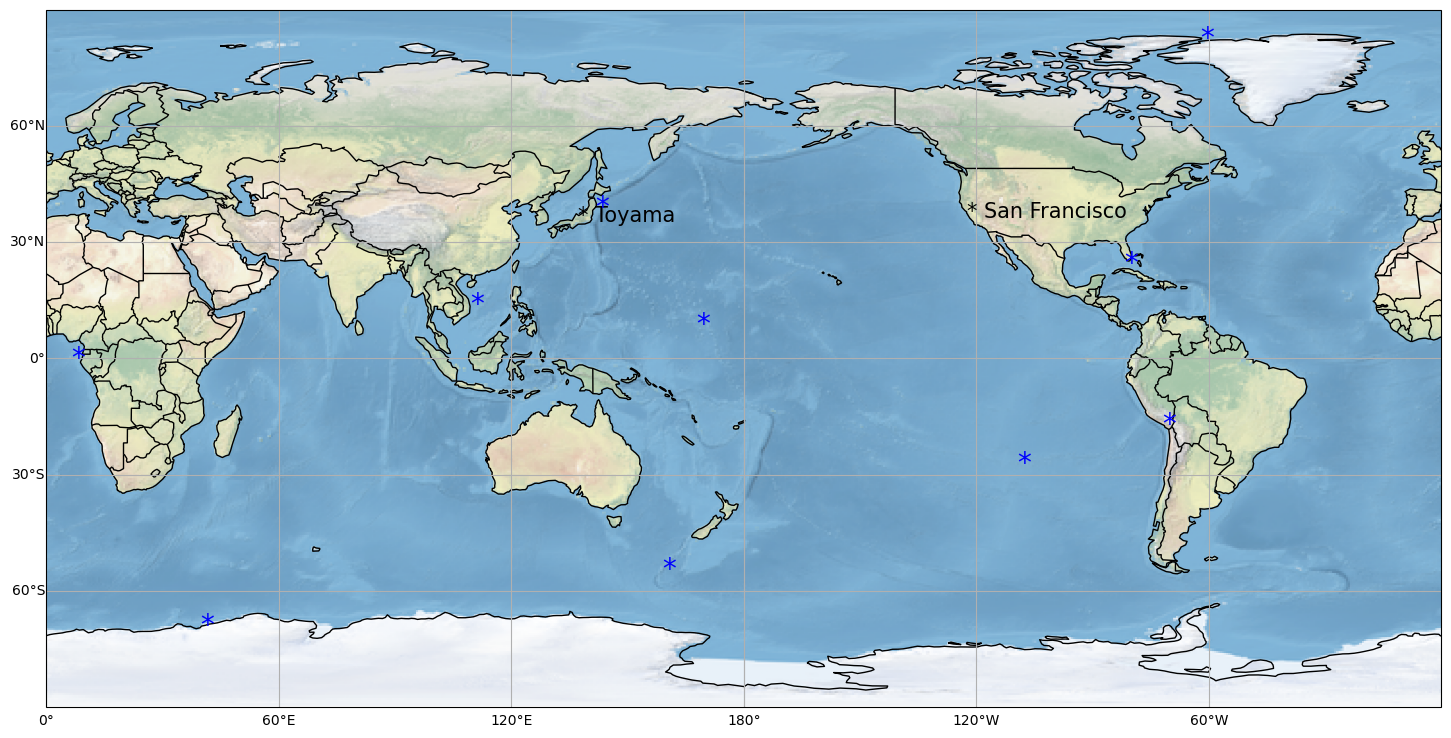

In [223]:
#make map and size
plt.figure(figsize=(18,12))

#set map type and scope
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
#ax.set_extent([-180,-40,0,75], crs=ccrs.PlateCarree())

#add map features and image
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.BORDERS)
ax.stock_img()

#add map lines and lat&long on axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlabels_style = {'size':20}
gl.ylabels_style = {'size':20}

#location data
SF_loc = (-122.47, 37.81)
Toyama_loc = (137.22, 36.77)
locs = [(39.60, -69.00),
        (158.96, -54.48),
        (-109.45, -27.15),
        (-72.11, -17.00),
        (6.51, 0.017),
        (167.73, 8.73),
        (109.25, 13.77),
        (-81.81, 24.55),
        (141.75, 39.02),
        (-62.32, 82.49)]

#add SF tide gauge to map
ax.annotate('* San Francisco', xy=SF_loc, 
           xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
           color='black', size='15', ha='left', va='center')

#add Toyama gauge to the map
ax.annotate('* Toyama', xy=Toyama_loc, 
           xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
           color='black', size='15', ha='left', va='center')

#plot other tide gauges
i = 0
while i < len(locs):
    ax.annotate('*', xy=locs[i], 
           xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
           color='blue', size='20', ha='left', va='center')
    i+=1

# Map Hypotheses
<ol> <h2>San Francisco</h2>
    <li> I expect to see tidal variability from the seasons, the moon's monthly orbit, and a semi-diurnal cycle.
    <li> I think sea level might increase over time.
    <li> Compare sea level with surface temperature trend.
</ol>

In [224]:
# open the data and assign names to each column
data = pd.read_csv(url1, names=['Year', 'Month', 'Day', 'Hour', 'Sea Level'])
data

,Year,Month,Day,Hour,Sea Level
0,1897,8,1,8,3292
1,1897,8,1,9,3322
2,1897,8,1,10,3139
3,1897,8,1,11,2835
4,1897,8,1,12,2377
...,...,...,...,...,...
1110323,2024,3,31,19,-32767
1110324,2024,3,31,20,-32767
1110325,2024,3,31,21,-32767
1110326,2024,3,31,22,2918


In [225]:
#remove negative numbers from ['Sea Level'] with Nan's
data['Sea Level'] = data['Sea Level'].replace(-32767, np.nan)
date = data.drop(labels='Sea Level', axis=1, errors='ignore')

# convert the time columns into a single datetime format
date = pd.to_datetime(date, format="%Y-%m-%d-%H")
date.head()

0   1897-08-01 08:00:00
1   1897-08-01 09:00:00
2   1897-08-01 10:00:00
3   1897-08-01 11:00:00
4   1897-08-01 12:00:00
dtype: datetime64[ns]

# Tidal Variability

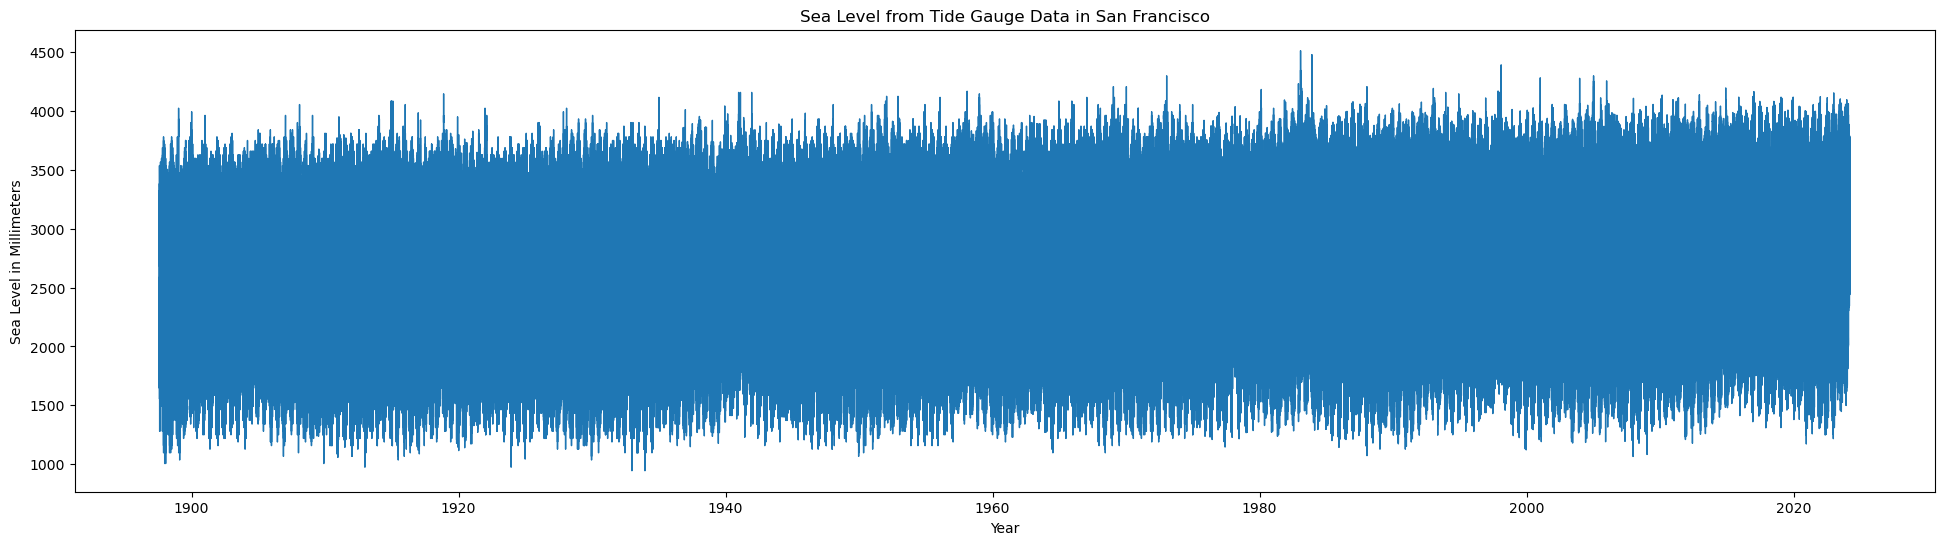

In [236]:
# plot the historical data from the tide gauge and scale the x-axis to the desired time interval
plt.figure(figsize=(24,6))
plt.plot(date, data['Sea Level'], linewidth=1)
plt.title('Sea Level from Tide Gauge Data in San Francisco')
plt.ylabel('Sea Level in Millimeters')
plt.xlabel('Year')
left = pd.to_datetime('2020-1-01')
right = pd.to_datetime('2020-2-29')
#plt.xlim(left, right)

# Fundamental Statistics

Text(0, 0.5, 'Sea Level in mm')

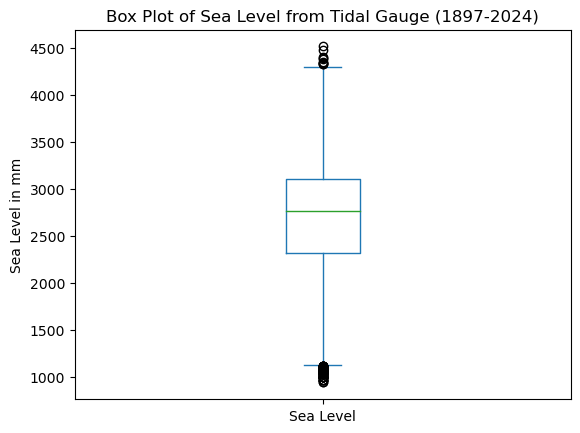

In [227]:
# make a box plot of the fundamental cycles of the wave data
ax = plt.plot(figsize=(12,12))
data['Sea Level'].plot(kind='box')
plt.title('Box Plot of Sea Level from Tidal Gauge (1897-2024)')
plt.ylabel('Sea Level in mm')

Text(0, 0.5, 'Sea Level in mm')

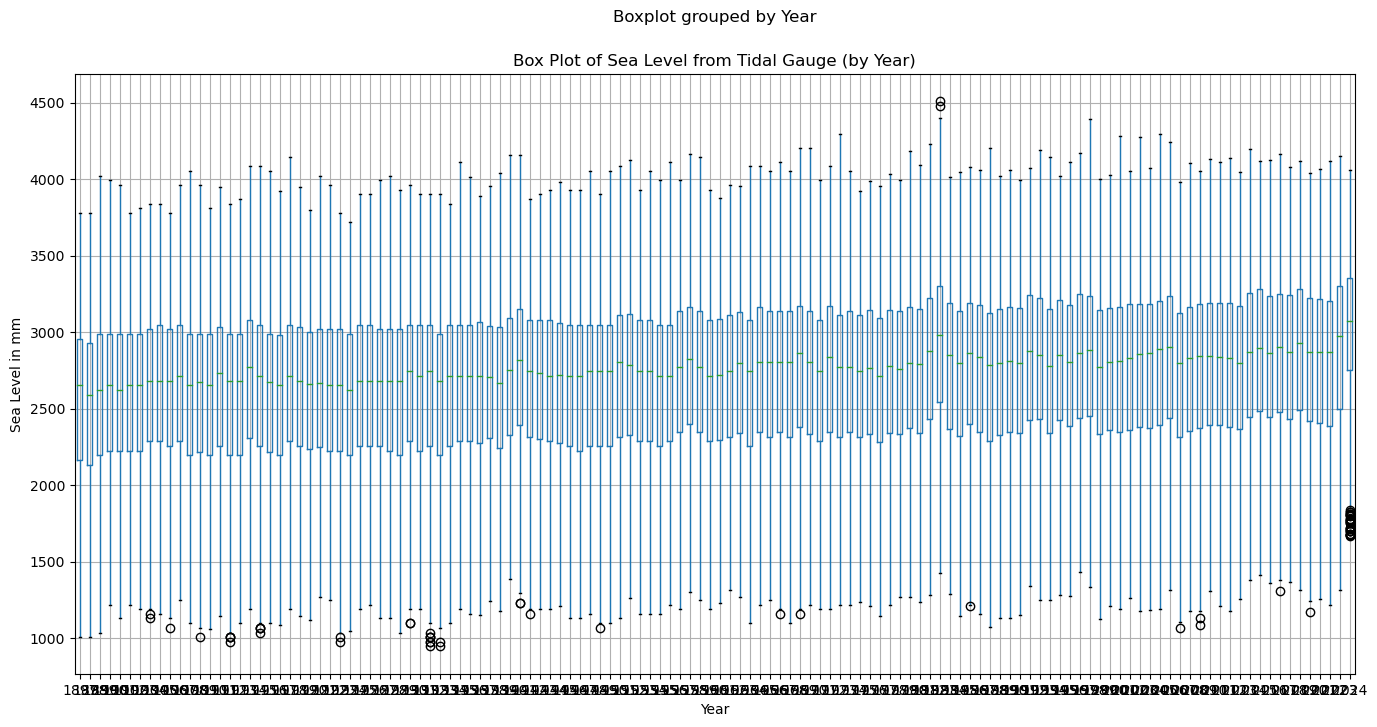

In [228]:
fig, axes = plt.subplots(figsize=((16,8)))
data.boxplot(ax=axes,column='Sea Level', by = 'Year')
plt.title('Box Plot of Sea Level from Tidal Gauge (by Year)')
plt.ylabel('Sea Level in mm')

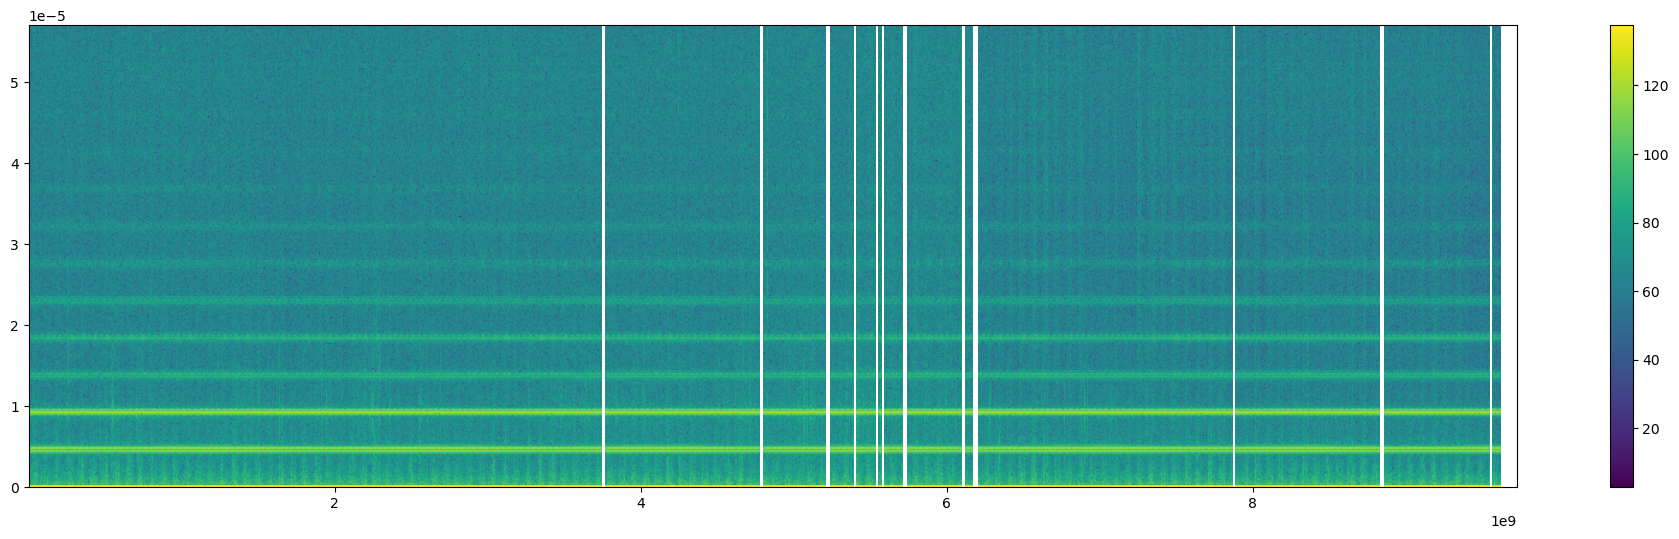

In [229]:
# Decompose the tidal signal into its frequencies
delta_t = 24*365 # for 24 hrs in a day and 365 in a year
plt.figure(figsize=(24,6))
Pxx, f, bins, im = plt.specgram(data['Sea Level'],NFFT=1024,Fs=1/delta_t)
plt.colorbar()

## Results of Spectrogram
Axis should be days, showing frequencies at 1/2 day and a full day.

C:\Users\Devin\AppData\Local\Temp\ipykernel_32380\1913506953.py:24: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  Bfit = np.linalg.lstsq(x,var)[0]


Text(0.5, 0, 'Year')

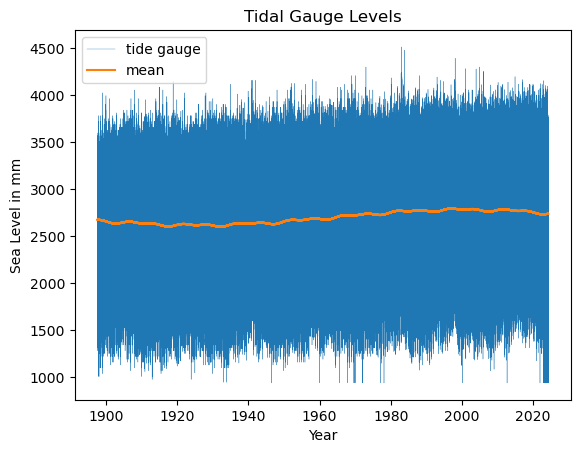

In [230]:
#remove seasonal variability and other harmonics
data2 = data.fillna(np.nanmean(data))
nt = len(data2['Sea Level'])
t = np.linspace(0,1,nt)
var = data2['Sea Level'][0:nt]

x = np.ones((nt,9),dtype=float)
w_day = 2.0 * np.pi / 24.0 / 15.0
w_san = w_day * 2.0 / 365.25
w_ann = w_day / 365.25
w_dec = w_day / (365.25 * 10.0)

for k in range(nt):
    x[k,0] = 1.0
    x[k,1] = np.cos(k*w_day)
    x[k,2] = np.sin(k*w_day)
    x[k,3] = np.cos(k*w_san)
    x[k,4] = np.sin(k*w_san)
    x[k,5] = np.cos(k*w_ann)
    x[k,6] = np.sin(k*w_ann)
    x[k,7] = np.cos(k*w_dec)
    x[k,8] = np.sin(k*w_dec)

Bfit = np.linalg.lstsq(x,var)[0]

fitvar = np.dot(x,Bfit)

plt.plot(date,data2['Sea Level'],label='tide gauge', linewidth='0.25')
plt.plot(date,fitvar,label='mean')
#plt.xlim(pd.to_datetime('01-01-2023'),
pd.to_datetime('01-10-2023')
plt.legend()
plt.title('Tidal Gauge Levels')
plt.ylabel('Sea Level in mm')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

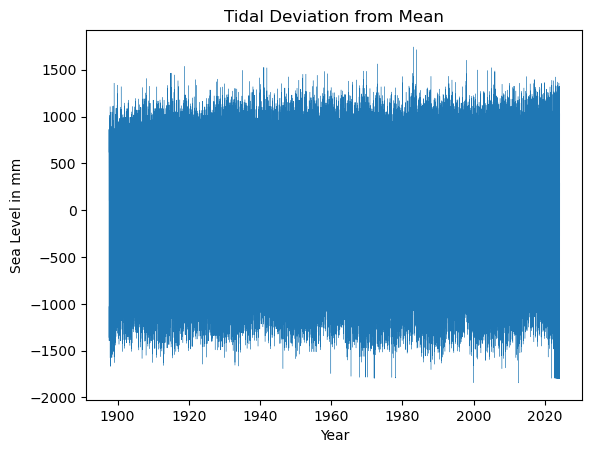

In [231]:
plt.plot(date,data2['Sea Level']- fitvar, linewidth='0.25')
plt.title('Tidal Deviation from Mean')
plt.ylabel('Sea Level in mm')
plt.xlabel('Year')

# Computing a fit for the trends

In [232]:
B = np.polyfit(data2.index.values,data2['Sea Level'],deg=1)
print(B)


[2.14684174e-04 2.57610353e+03]


The slope value, B[0], a positive number but it is very small. It is hard to say that the sea level at San Fransisco is rising or falling.

# Comparing the SF tide gauge with a tide gauge across the Pacific
Using data from a tide gauge in Toyama, Japan. This gauge is located at a similar latitude as SF, but is on the western side of the Pacific Basin.

In [242]:
# load the Toyama data and format it similar to the SF gauge
toyama = pd.read_csv(url2, names=['Year', 'Month', 'Day', 'Hour', 'Sea Level'])
toyama['Sea Level'] = toyama['Sea Level'].replace(-32767, np.nan)
toyama = toyama.fillna(np.nanmean(data))
date2 = toyama.drop(labels='Sea Level', axis=1, errors='ignore')

# convert the time columns into a single datetime format
date2 = pd.to_datetime(date2, format="%Y-%m-%d-%H")
toyama

,Year,Month,Day,Hour,Sea Level
0,1967,4,30,15,1110.0
1,1967,4,30,16,1080.0
2,1967,4,30,17,1070.0
3,1967,4,30,18,1100.0
4,1967,4,30,19,1120.0
...,...,...,...,...,...
498955,2024,3,31,10,1440.0
498956,2024,3,31,11,1400.0
498957,2024,3,31,12,1350.0
498958,2024,3,31,13,1320.0


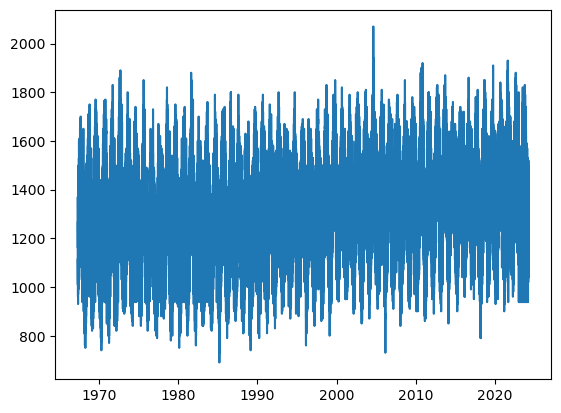

In [243]:
# quickly plot the data to check for outliers errors.
plt.plot(date2, toyama['Sea Level'])

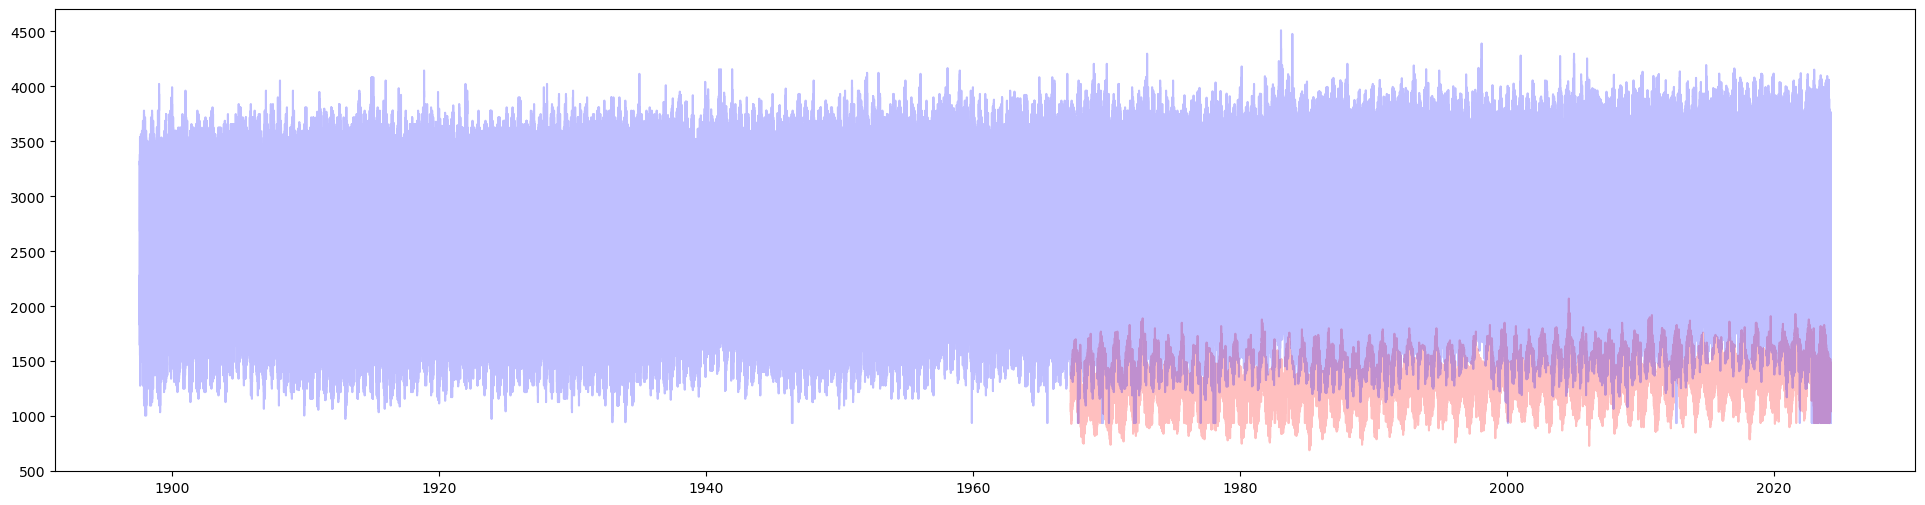

In [245]:
plt.figure(figsize=(24,6))
plt.plot(date2, toyama['Sea Level'], alpha=0.25, label='Toyama', color='red')
plt.plot(date, data2['Sea Level'], alpha=0.25, label='San Fransisco', color='blue')
left = pd.to_datetime('2020-1-01')
right = pd.to_datetime('2020-2-29')
#plt.xlim(left, right)

In [247]:
B2 = np.polyfit(toyama.index.values,toyama['Sea Level'],deg=1)
print(B2)

[3.52884097e-04 1.23374458e+03]


The slope of the data from Toyama is also a very small number, e^-4.